In [ ]:
# import pandas as ___
___ = pd.___("/content/AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data['Month'] = pd.___(data['Month'])
data.___('Month', inplace=True)

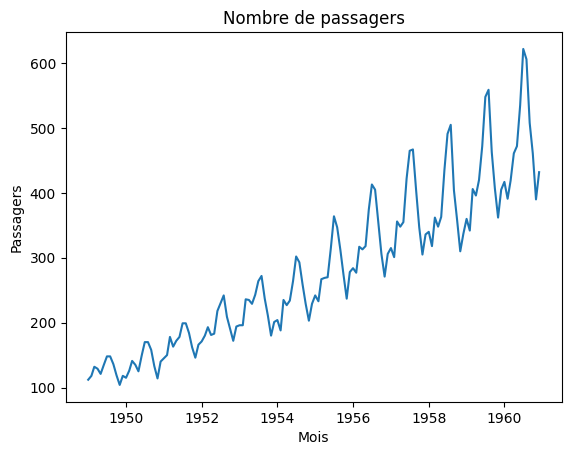

In [ ]:
import matplotlib.pyplot as plt

___(___)(data['#Passengers'],)

In [ ]:
from sklearn.preprocessing import ___
scaler=___(feature_range=(0,1))
data=scaler.___(data)

In [ ]:
___ = int(len(data)*0.75)
___ = len(data)-train
train_data,test_data=data[0:train,:],data[train:len(data),:]

In [ ]:
import numpy as np
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 4
X_train, y____ = create_dataset(train_data, time_step)
X_test, y___ = create_dataset(test_data, time_step)


In [ ]:
X_train.shape, y_train.shape

((103, 4), (103,))

In [ ]:
X_train =X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X____ = X_test.reshape(X_test.shape[0], X_train.shape[1], 1)
print(X_train.shape)
print(X_test.shape)

(103, 4, 1)
(31, 4, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0388 - val_loss: 0.0324
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0100 - val_loss: 0.0323
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0108 - val_loss: 0.0323
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0076 - val_loss: 0.0292
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0077 - val_loss: 0.0506
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0078 - val_loss: 0.0305
Epoch 7/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0086 - val_loss: 0.0303
Epoch 8/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0086 - val_loss: 0.0363
Epoch 9/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0055 - val_loss: 0.0316
Epoch 10/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0070 - val_loss: 0.0302
Epoch 11/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0043 - val_loss: 0.0222
Epoch 12/100
103/103 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
test_predict=model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


In [ ]:
X_test.shape

(31, 4, 1)

In [ ]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(ytest,test_predict))

0.10222596369289111

In [ ]:
test_predict=scaler.inverse_transform(test_predict)
y___ = scaler.inverse_transform(ytest.reshape(-1,1))

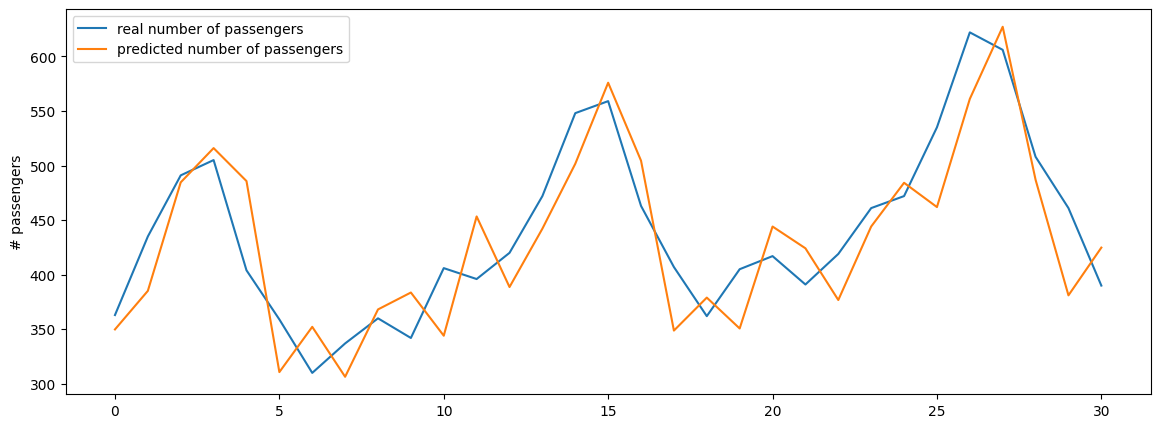

In [ ]:
plt.figure(figsize=(14,5))
___(___)(ytest, label = 'real number of passengers')
___(___)(test_predict, label = 'predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()